In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
pi = np.pi
plt.rcParams.update({
        "font.weight": "bold",  # bold fonts
        "font.size":10,
        "lines.linewidth": 2,   # thick lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
        "axes.labelsize" : 15,
        'legend.labelspacing':0.95
    })
pi = np.pi
Vnom = 400
Pbase = 1000
Vbase = Vnom*np.sqrt(2/3)
Ibase = 2*(Pbase/Vbase) #vdid +vqiq = 2P
Zbase = Vbase/Ibase


PLoad = 800;
QLoad = 600
Inom = Pbase/(np.sqrt(3)*Vnom)
RLoad = PLoad/(3*Inom**2)
XLoad = QLoad/(3*Inom**2)

In [2]:
data_general = np.loadtxt("data_general.csv",delimiter=",", dtype=float)
tg,vag,vbg,vcg,itg,vtg,wg = data_general

### For General Values

In [3]:
from Inverter_model import Inverter

In [4]:
t0 = 0
t = 5
dt = 0.00001
t_eval = np.arange(t0,t,dt)
x0 = np.zeros(15)

In [5]:
sol_general = solve_ivp(Inverter,[t0,t],y0 = x0,t_eval=t_eval)
Ifdg,Ifqg,Vcdg,Vcqg,Iodg,Ioqg,Vidg,Viqg,Eqdg,Eddg,deltag,d_wg,Efdg,Psvg,Pmg = sol_general.y

In [6]:
Vodg = Iodg*RLoad - Ioqg*XLoad
Voqg= Iodg*XLoad + Ioqg*RLoad
I_t = np.sqrt(Iodg**2 + Ioqg**2)

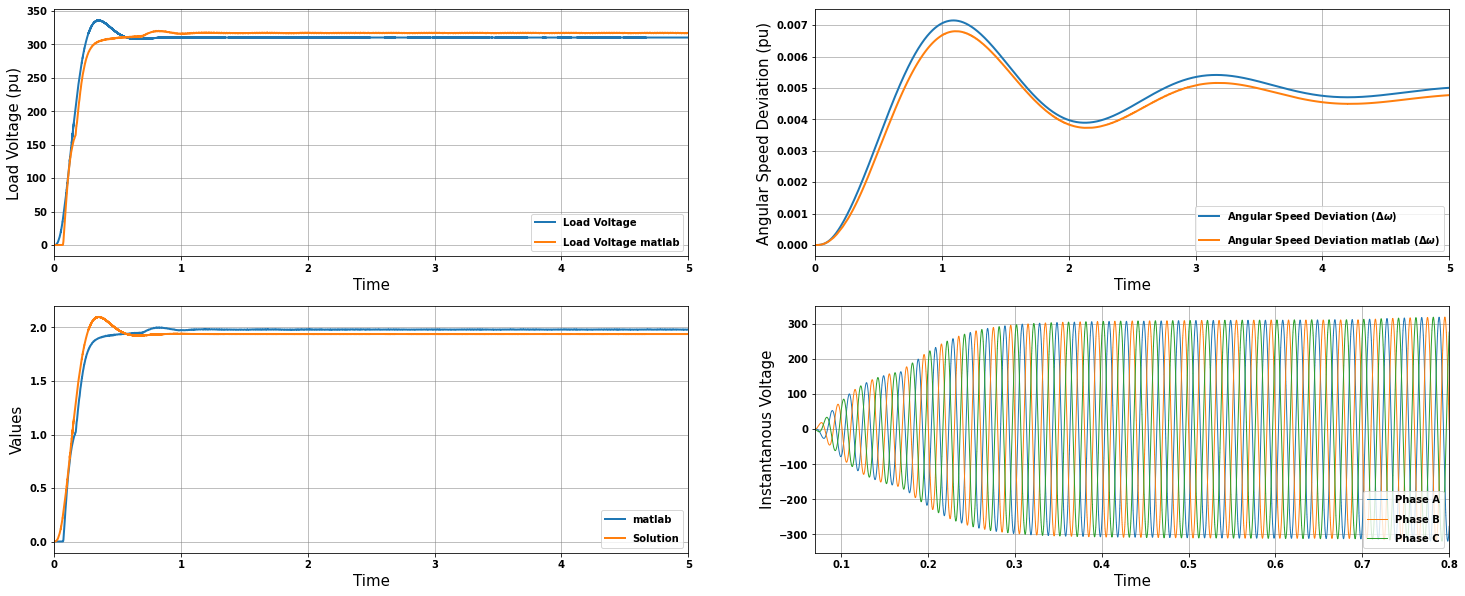

In [7]:
fig, axs = plt.subplots(2, 2,figsize = (25,10))
axs[0, 0].plot(t_eval,np.sqrt(Vodg**2 + Voqg**2), label = "Load Voltage")
axs[0, 0].plot(tg,vtg, label = "Load Voltage matlab")
axs[0, 0].grid()
axs[0, 0].set_xlim([0,5])
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Load Voltage (pu)")
axs[0, 0].legend()

axs[0,1].plot(t_eval,d_wg, label = "Angular Speed Deviation ($\Delta\omega$)")
axs[0,1].plot(tg,wg, label = "Angular Speed Deviation matlab ($\Delta\omega$)")
axs[0,1].set_xlim([0,5])
axs[0,1].grid()
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Angular Speed Deviation (pu)")
axs[0,1].legend(loc = 'lower right')


axs[1,0].plot(tg,itg, label = "matlab")
axs[1,0].plot(t_eval,I_t, label = "Solution")
axs[1,0].set_xlim([0,5])
axs[1,0].grid()
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Values")
axs[1,0].legend(loc = 'lower right')

axs[1,1].plot(tg,vag, label = "Phase A",linewidth=1)
axs[1,1].plot(tg,vbg, label = "Phase B",linewidth=1)
axs[1,1].plot(tg,vcg, label = "Phase C",linewidth=1)
axs[1,1].set_xlim([0.07,0.8])
axs[1,1].grid()
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Instantanous Voltage")
axs[1,1].legend(loc = 'lower right')

#plt.savefig('Images/General_Values.pdf',dpi = 300, bbox_inches='tight')

### Data Optimal

In [9]:
data_optimal = np.loadtxt("data_optimal.csv",delimiter=",", dtype=float)
to,vao,vbo,vco,ito,vto,wo = data_optimal

In [10]:
from Inverter_model_optimal import Inverter_optimal

In [11]:
t0 = 0
t = 5
dt = 0.00001
t_eval = np.arange(t0,t,dt)
x0 = np.zeros(15)

In [12]:
sol_optimal = solve_ivp(Inverter_optimal,[t0,t],y0 = x0,t_eval=t_eval)
Ifdo,Ifqo,Vcdo,Vcqo,Iodo,Ioqo,Vido,Viqo,Eqdo,Eddo,deltao,d_wo,Efdo,Psvo,Pmo = sol_optimal.y

In [13]:
Vodo = Iodo*RLoad - Ioqo*XLoad
Voqo= Iodo*XLoad + Ioqo*RLoad
I_to = np.sqrt(Iodo**2 + Ioqo**2)

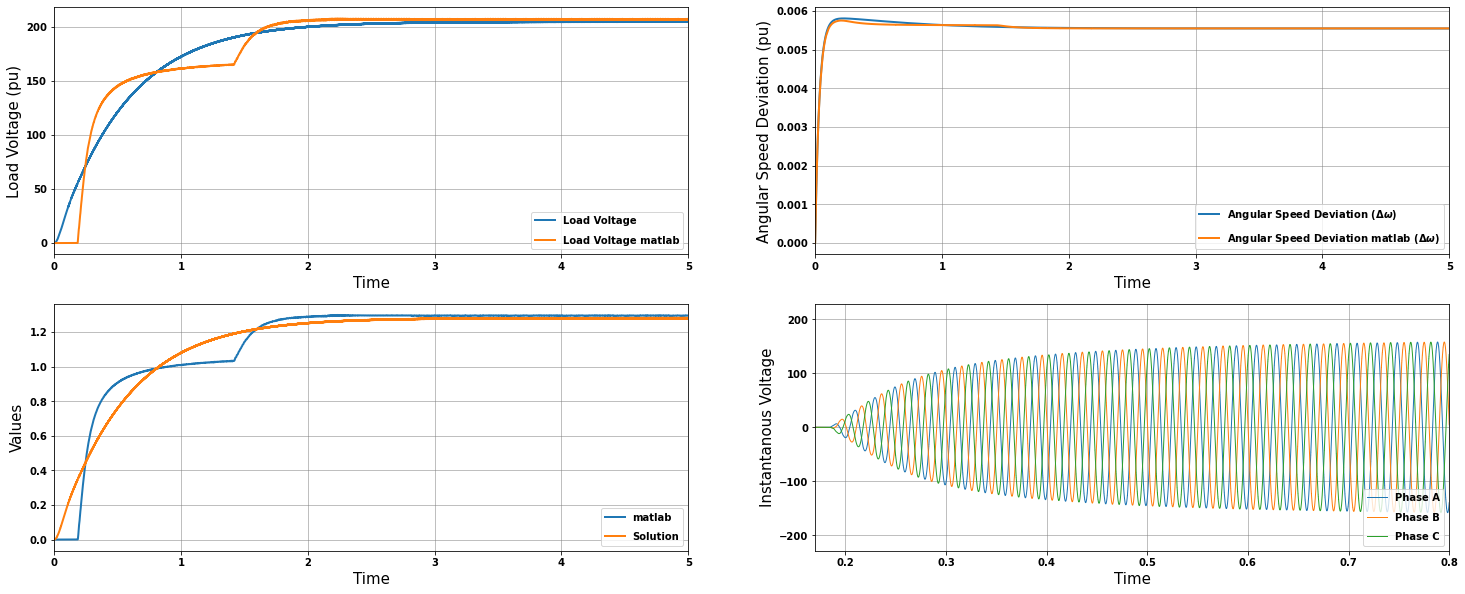

In [14]:
fig, axs = plt.subplots(2, 2,figsize = (25,10))
axs[0, 0].plot(t_eval,np.sqrt(Vodo**2 + Voqo**2), label = "Load Voltage")
axs[0, 0].plot(to,vto, label = "Load Voltage matlab")
axs[0, 0].grid()
axs[0, 0].set_xlim([0,5])
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Load Voltage (pu)")
axs[0, 0].legend()

axs[0,1].plot(t_eval,d_wo, label = "Angular Speed Deviation ($\Delta\omega$)")
axs[0,1].plot(to,wo, label = "Angular Speed Deviation matlab ($\Delta\omega$)")
axs[0,1].set_xlim([0,5])
axs[0,1].grid()
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Angular Speed Deviation (pu)")
axs[0,1].legend(loc = 'lower right')


axs[1,0].plot(to,ito, label = "matlab")
axs[1,0].plot(t_eval,I_to, label = "Solution")
axs[1,0].set_xlim([0,5])
axs[1,0].grid()
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Values")
axs[1,0].legend(loc = 'lower right')

axs[1,1].plot(to,vao, label = "Phase A",linewidth=1)
axs[1,1].plot(to,vbo, label = "Phase B",linewidth=1)
axs[1,1].plot(to,vco, label = "Phase C",linewidth=1)
axs[1,1].set_xlim([0.17,0.8])
axs[1,1].grid()
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Instantanous Voltage")
axs[1,1].legend(loc = 'lower right')

#plt.savefig('Images/General_Values.pdf',dpi = 300, bbox_inches='tight')